In [71]:
!pip install opencv-python 
!pip install matplotlib

In [11]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [12]:
def show_img(image, title ="image"):
    cv2.imshow(title, image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [38]:
def gaussian_function(u, v, sigma):
    pi = 3.14
    return 1/2*pi*sigma**2 * math.exp(-(u**2 + v**2)/sigma**2)

def gaussian_filter(fsize='Int'):
    sigma = 1.5
    filter = np.zeros((fsize, fsize))
    for i in range(fsize):
        for j in range(fsize):
            filter[i,j] = gaussian_function(i-fsize//2, j-fsize//2, sigma)
    return filter/np.sum(filter)
        

In [14]:
def median_filter(image, fsize='Int'):

    fsize_half = fsize//2
    
    filter = np.zeros((fsize, fsize))

    z_image = np.pad(image, fsize_half, mode='constant')#Zero-padding

    width, height = image.shape
    #width, height, dim = image.shape in color
    dim = 1
    
    output_image = np.zeros((width, height, dim))
    
    
    for d in range(dim):
        for w in range(fsize_half, width+fsize_half, 1):
            for h in range(fsize_half, height+fsize_half, 1):
                output_image[w-fsize_half, h-fsize_half] = np.median(z_image[w-fsize_half: w+fsize_half+1, h-fsize_half:h+fsize_half+1])

    return output_image.astype(np.uint8)

In [35]:
gaussian_filter(5)

array([[0.00085769, 0.00688827, 0.01379441, 0.00688827, 0.00085769],
       [0.00688827, 0.05532101, 0.11078564, 0.05532101, 0.00688827],
       [0.01379441, 0.11078564, 0.22185889, 0.11078564, 0.01379441],
       [0.00688827, 0.05532101, 0.11078564, 0.05532101, 0.00688827],
       [0.00085769, 0.00688827, 0.01379441, 0.00688827, 0.00085769]])

In [15]:
def conv(image, filter, fsize='Int'):
    fsize_half = fsize//2
    
    z_image = np.pad(image, fsize_half, mode='constant')#Zero-padding
    
    width, height = image.shape
    #width, height, dim = image.shape in color
    dim = 1
    filter_width, filter_height = filter.shape

    output_image = np.zeros((width, height, dim))

    for d in range(dim):
        for w in range(fsize_half, width+fsize_half, 1):
            for h in range(fsize_half, height+fsize_half, 1):
                output_image[w-fsize_half, h-fsize_half] = np.sum(filter*z_image[w-fsize_half: w+fsize_half+1, h-fsize_half:h+fsize_half+1])

    return output_image.astype(np.uint8)
                


In [16]:
#File
IMAGE_LIST_1 = ["HW3 Image Samples/Noise Filtering/Fig0503 (original_pattern).jpg",
                "HW3 Image Samples/Noise Filtering/Fig0504(a)(gaussian-noise).jpg",
                "HW3 Image Samples/Noise Filtering/Fig0504(i)(salt-pepper-noise).jpg",
                "HW3 Image Samples/Noise Filtering/Lena_noise.png",
                "HW3 Image Samples/Noise Filtering/Gaussian noise.png",
                "HW3 Image Samples/Noise Filtering/Salt&pepper noise.png"]

fig = "HW3 Image Samples/Noise Filtering/Fig0503 (original_pattern).jpg"
fig_gaussian = "HW3 Image Samples/Noise Filtering/Fig0504(a)(gaussian-noise).jpg"
fig_saltAndPepper = "HW3 Image Samples/Noise Filtering/Fig0504(i)(salt-pepper-noise).jpg"

lena_noise = "HW3 Image Samples/Noise Filtering/Lena_noise.png"
lena_gaussian = "HW3 Image Samples/Noise Filtering/Gaussian noise.png"
lena_saltAndPepper = "HW3 Image Samples/Noise Filtering/Salt&pepper noise.png"

Fig0503 (original_pattern).jpg


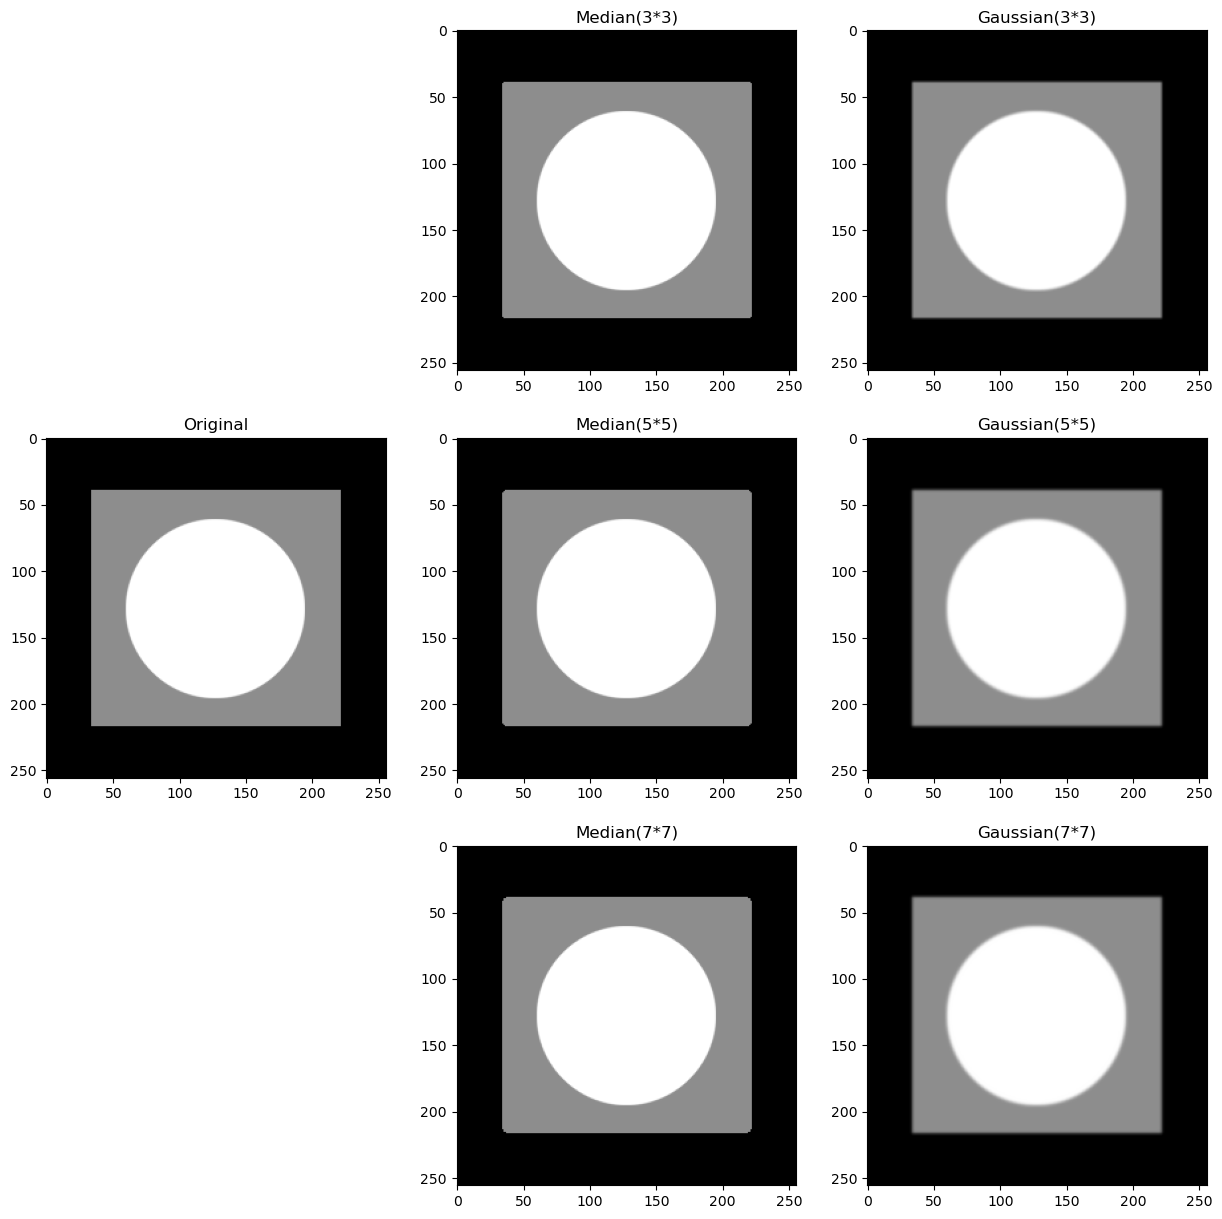

Fig0504(a)(gaussian-noise).jpg


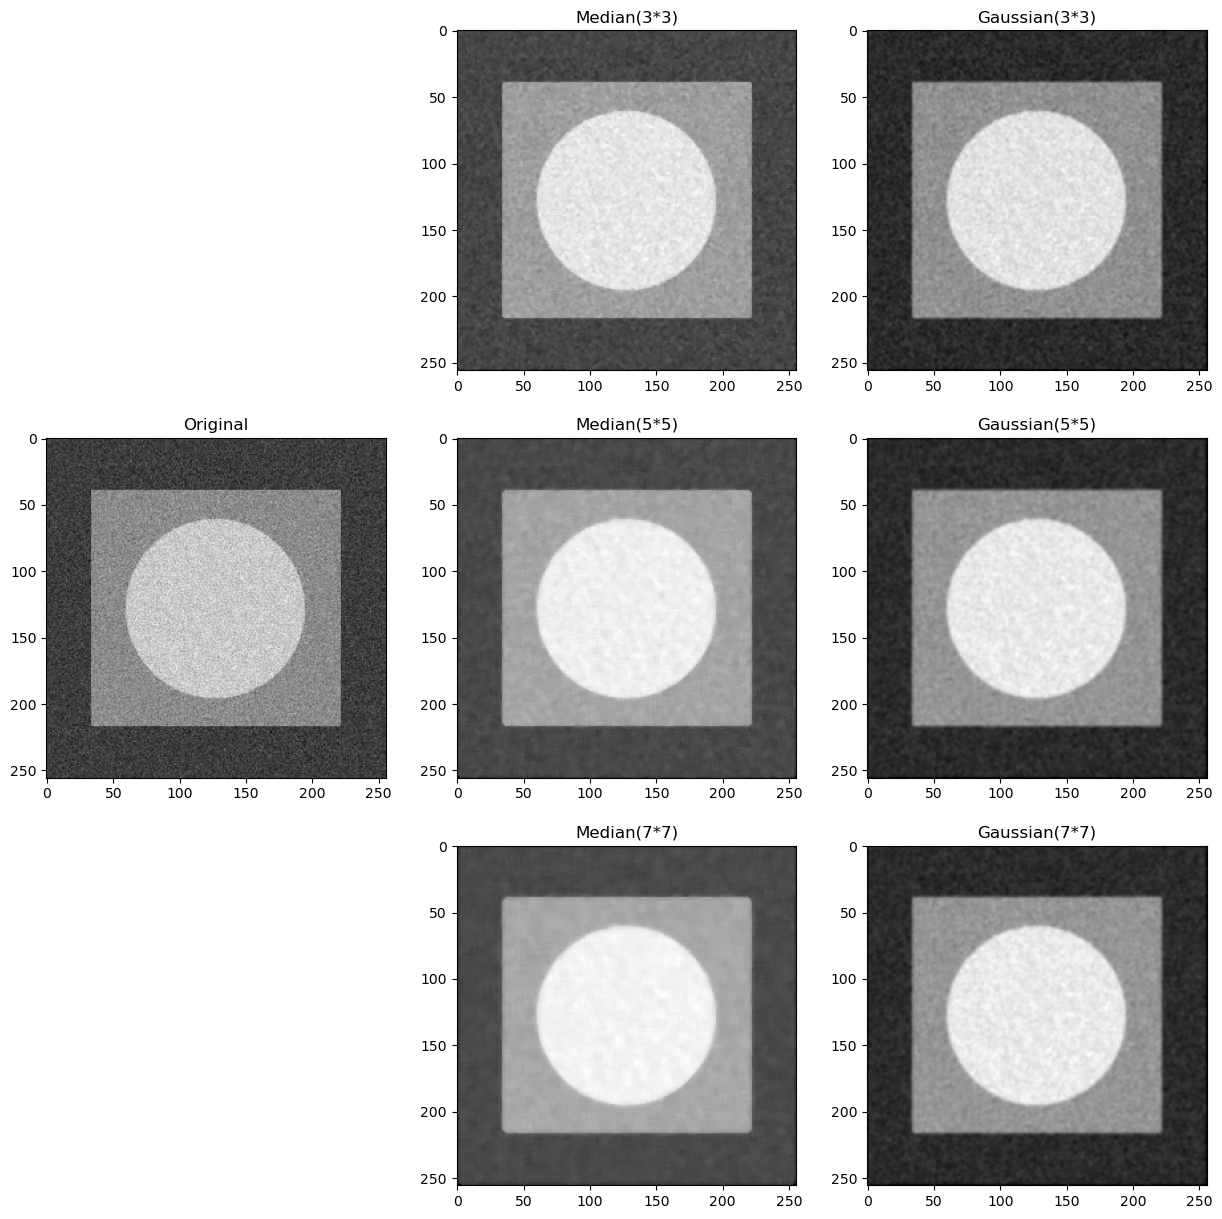

Fig0504(i)(salt-pepper-noise).jpg


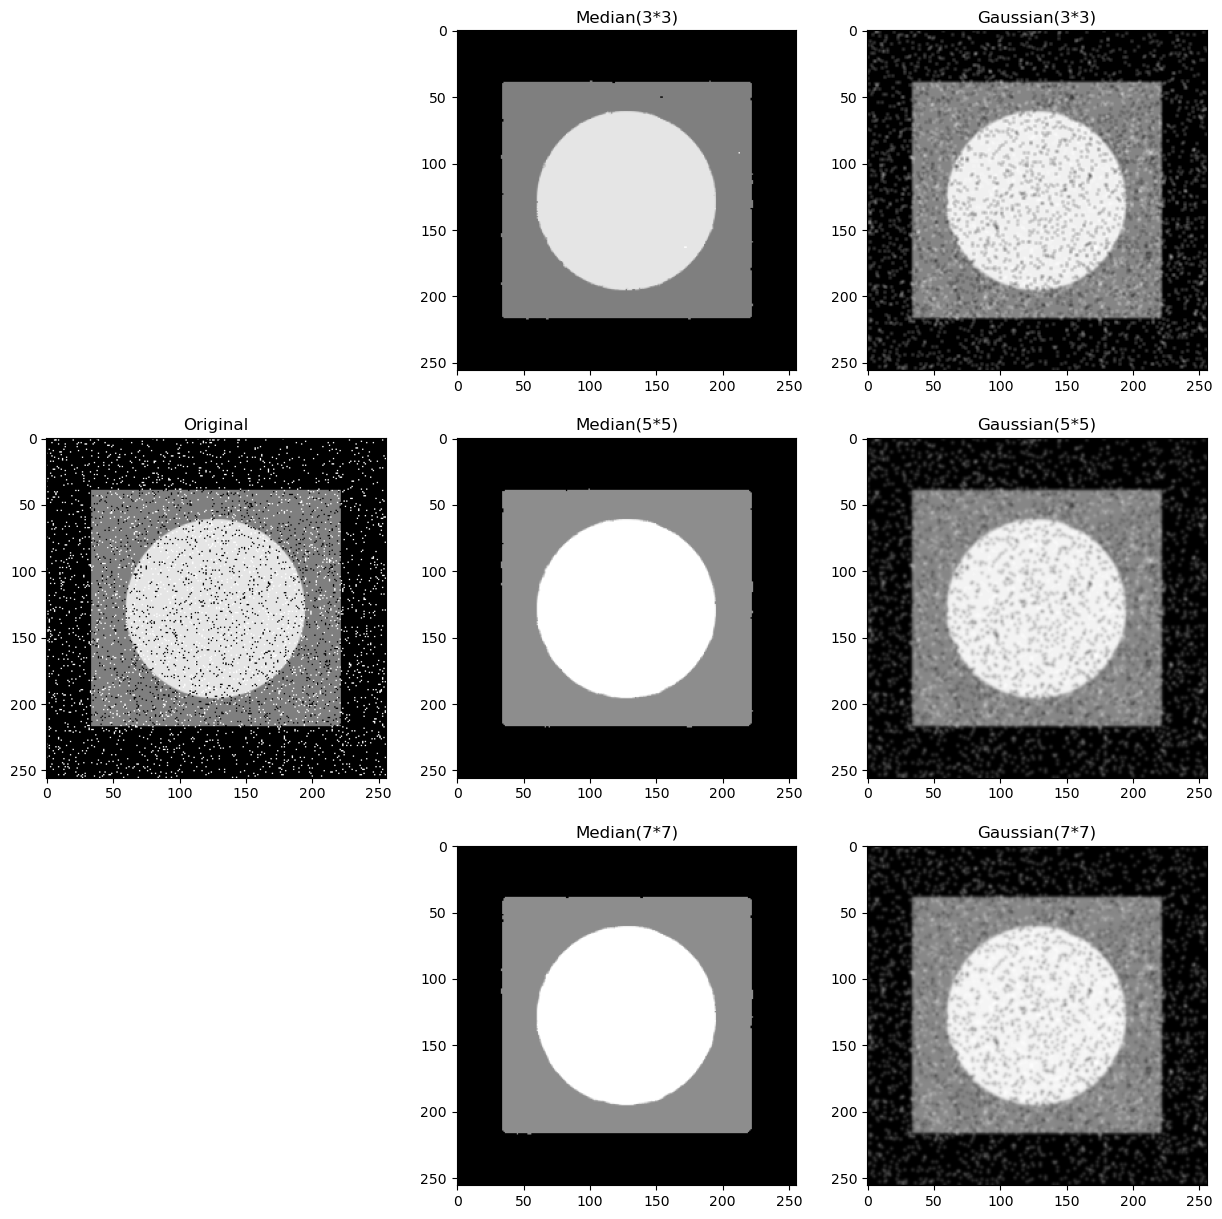

Lena_noise.png


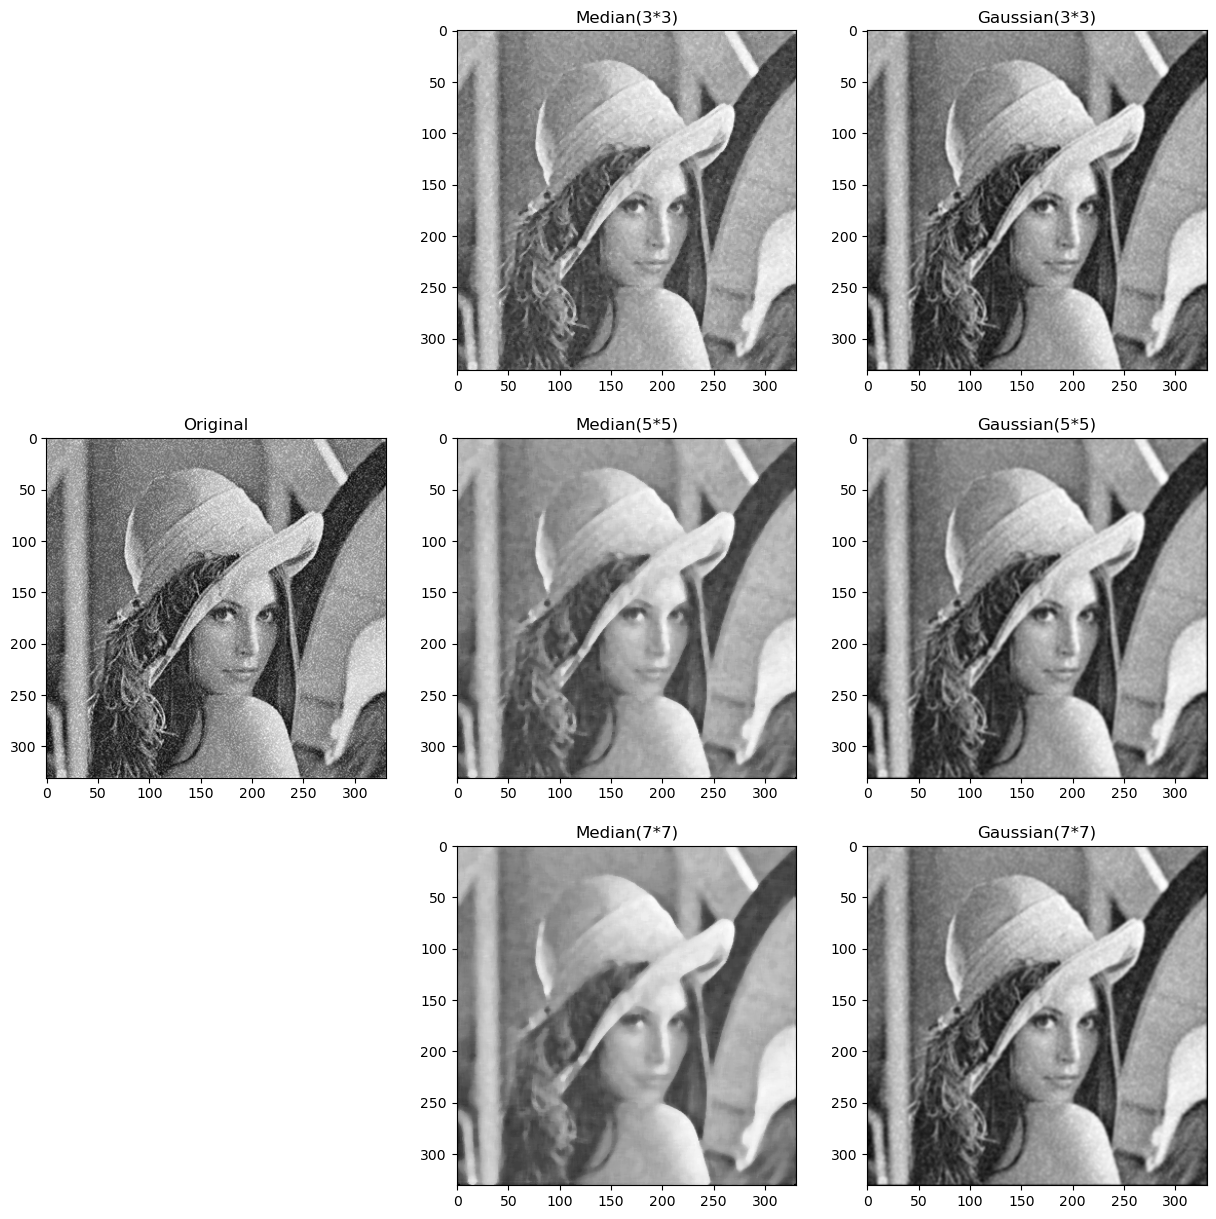

Gaussian noise.png


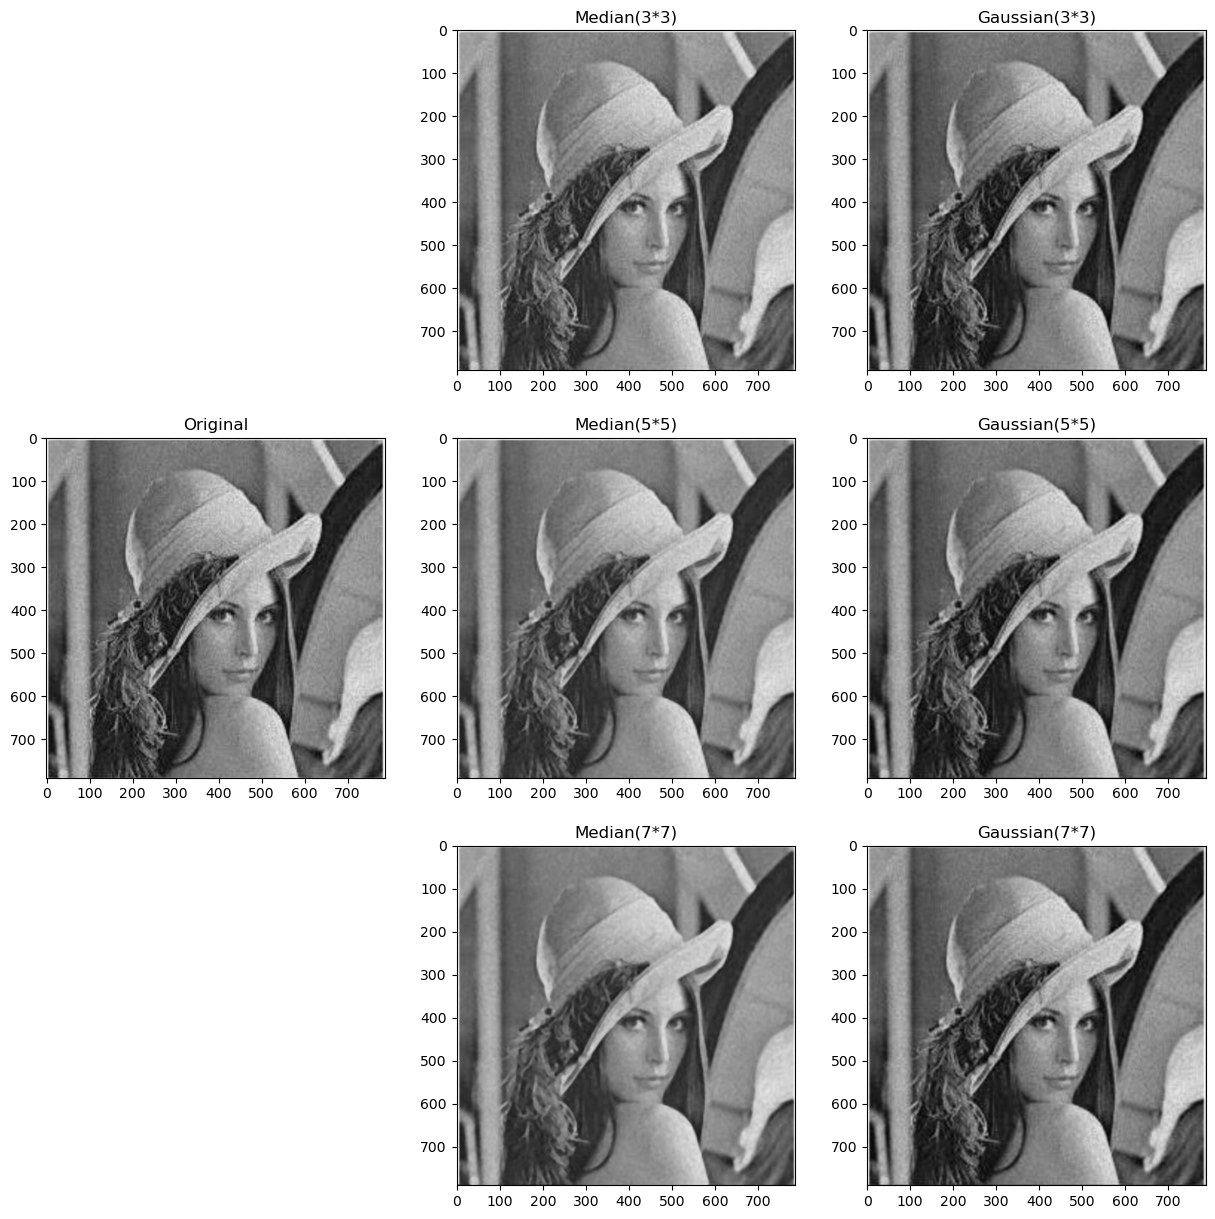

Salt&pepper noise.png


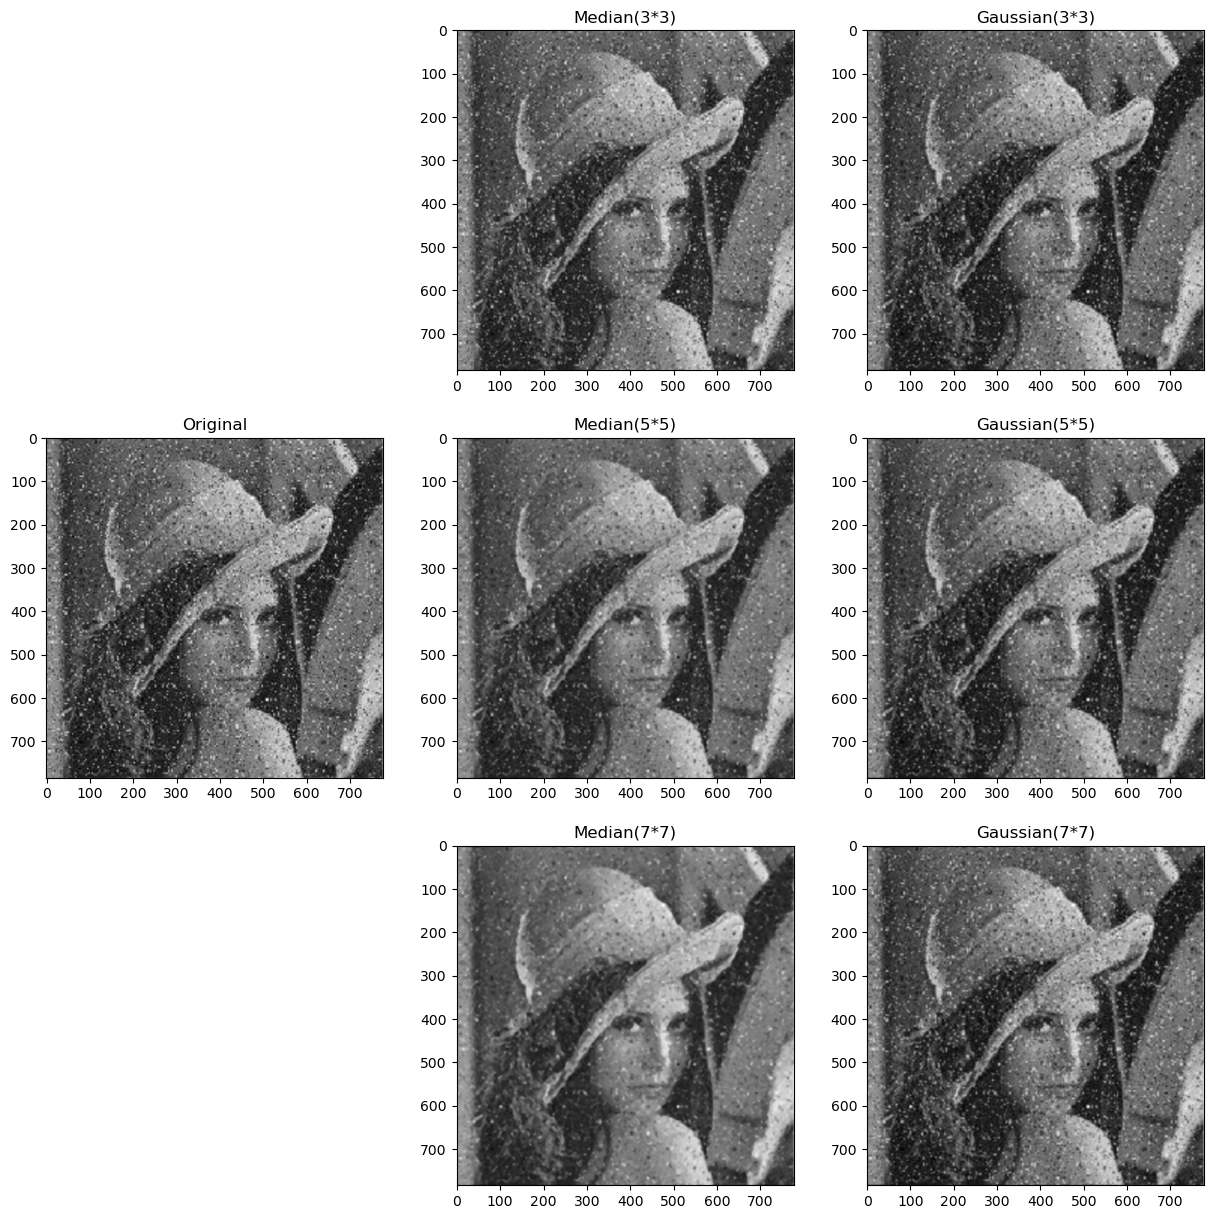

In [40]:
for image_dir in IMAGE_LIST_1:
    print(image_dir[34:])
    src = cv2.imread(image_dir, cv2.IMREAD_COLOR) # [Height, Width, Channel]
    gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    
    med3 = median_filter(gray_src, 3)
    gaussian3 = conv(gray_src, gaussian_filter(3), 3)

    med5 = median_filter(gray_src, 5)
    gaussian5 = conv(gray_src, gaussian_filter(5), 5)

    med7 = median_filter(gray_src, 7)
    gaussian7 = conv(gray_src, gaussian_filter(7), 7)
   
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(3, 3, 4)
    plt.imshow(gray_src, cmap='gray')
    plt.title('Original')

    plt.subplot(3, 3, 2)
    plt.imshow(med3, cmap='gray')
    plt.title('Median(3*3)')

    plt.subplot(3, 3, 3)
    plt.imshow(gaussian3, cmap='gray')
    plt.title('Gaussian(3*3)')

    plt.subplot(3, 3, 5)
    plt.imshow(med5, cmap='gray')
    plt.title('Median(5*5)')

    plt.subplot(3, 3, 6)
    plt.imshow(gaussian5, cmap='gray')
    plt.title('Gaussian(5*5)')

    plt.subplot(3, 3, 8)
    plt.imshow(med7, cmap='gray')
    plt.title('Median(7*7)')

    plt.subplot(3, 3, 9)
    plt.imshow(gaussian7, cmap='gray')
    plt.title('Gaussian(7*7)')

    plt.show()

In [51]:
np.shape(med7)
med7s = np.squeeze(med7)
medmed = median_filter(med7s, 7)

<function matplotlib.pyplot.show(close=None, block=None)>

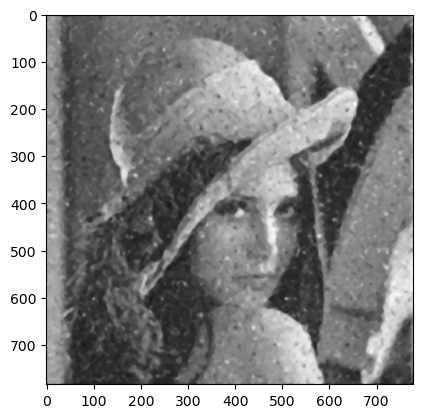

In [52]:
plt.imshow(medmed, cmap='gray')
plt.show

In [55]:
def highBoost_filter1(a):
    
    filter = np.array([-1,-1,-1],
                      [-1,8,1],
                      [-1,-1,-1])
    filter[1][1] = filter[1][1]+a
    return filter

def highBoost_filter2(a):

    filter = np.array([0,-1,0],
                      [-1,4,-1],
                      [0,-1,0])

    filter[1][1] = filter[1][1]+a

    return filter

In [61]:
def prewittx():
    filter = np.array([[-1,0,1],
                      [-1,0,1],
                      [-1,0,1]])
    return filter

def prewitty():
    filter = np.array([[1,1,1],
                      [0,0,0],
                      [-1,-1,-1]])
    return filter

def prewitt(image):
    px = conv(image, prewittx(), 3)
    py = conv(image, prewitty(), 3)

    return px+py

In [62]:
def sobelx():
    filter = np.array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]])
    return filter

def sobely():
    filter = np.array([[1,2,1],
                      [0,0,0],
                      [1,2,1]])
    return filter

def sobel(image):
    sx = conv(image, sobelx(), 3)
    sy = conv(image, sobely(), 3)

    return sx+sy

In [63]:
src = cv2.imread(fig, cv2.IMREAD_COLOR) # [Height, Width, Channel]
gray_src = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

In [64]:
sbl = sobel(gray_src)

In [65]:
show_img(sbl)